<a href="https://colab.research.google.com/github/andinivarianti/QuadraInnovators/blob/main/Final_Project_Group_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HR Analytics: Job Change of Data Scientists

**Group 4 Quadra Innovators**

*   Irza Nanda Herdian (Bussiness / Data Analyst)
*   Andini Varianti Putri (Project Manager)
*   Samuel Louis Fajar Hasibuan (Data Scientist)
*   Muhammad Naufal Zaidan (Data Engineer)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
df = pd.read_csv("aug_train.csv")

## 1. DESCRIBE DATA

In [ ]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

**Features**
* enrollee_id : Unique ID for candidate.
* city: City code.
* city_ development _index : Developement index of the city (scaled).
* gender: Gender of candidate
* relevent_experience: Relevant experience of candidate
* enrolled_university: Type of University course enrolled if any
* education_level: Education level of candidate
* major_discipline :Education major discipline of candidate
* experience: Candidate total experience in years
* company_size: No of employees in current employer's company
* company_type : Type of current employer
* last_new_job: Difference in years between previous job and current job
* training_hours: training hours completed
* target: 0 – Not looking for job change, 1 – Looking for a job change



In [ ]:
df.shape

(19158, 14)

In [ ]:
df.isnull().sum() #check missing values

,0
enrollee_id,0
city,0
city_development_index,0
gender,4508
relevent_experience,0
enrolled_university,386
education_level,460
major_discipline,2813
experience,65
company_size,5938


In [ ]:
df.nunique() #Checking for Unique Values

,0
enrollee_id,19158
city,123
city_development_index,93
gender,3
relevent_experience,2
enrolled_university,3
education_level,5
major_discipline,6
experience,22
company_size,8


In [ ]:
unique_gender_values = df['gender'].unique()
print(unique_gender_values)

['Male' nan 'Female' 'Other']


In [ ]:
df.duplicated().sum() #Checking for Duplicate Values

0

In [ ]:
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


## 2. UNIVARIATE ANALYSIS

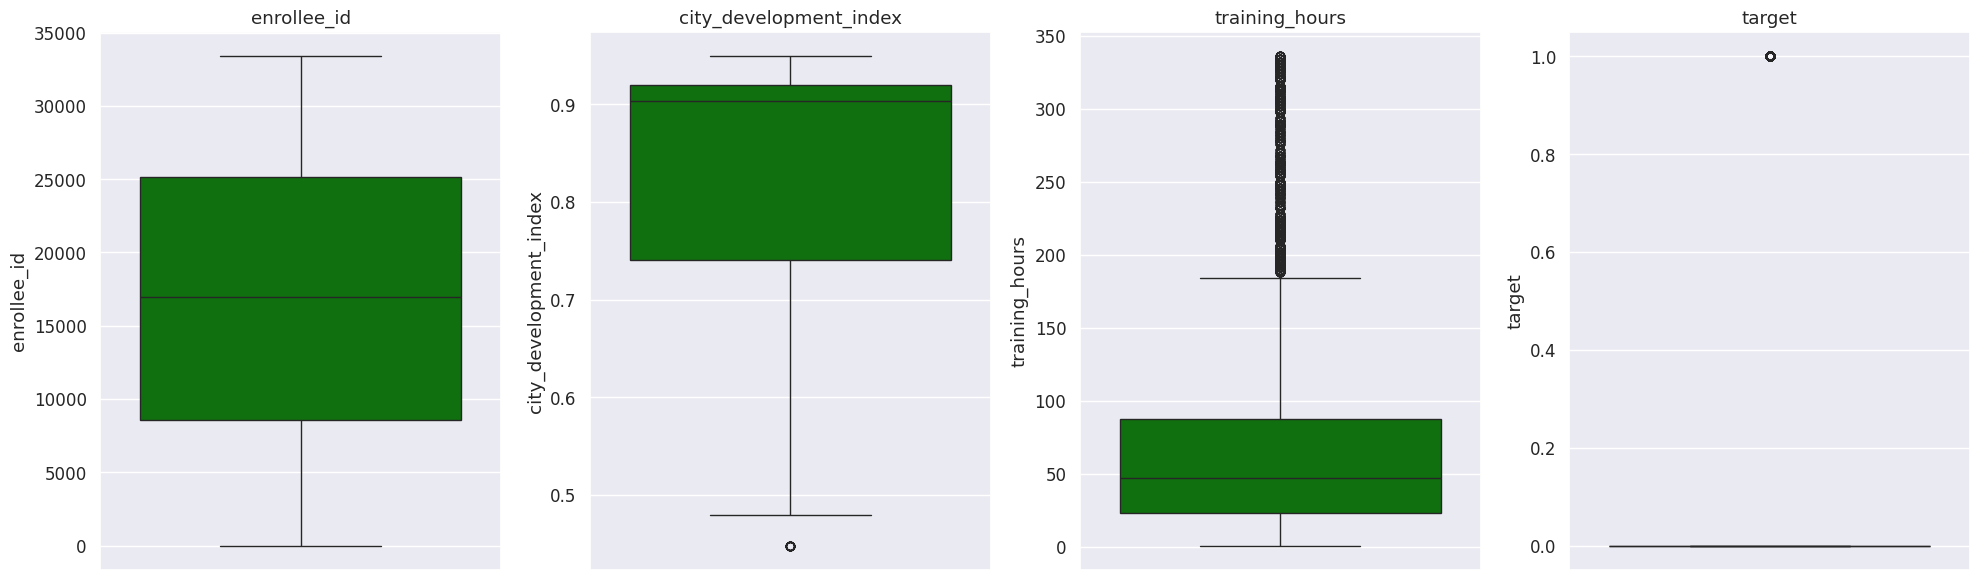

In [ ]:
# Identify numerical columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
numerical_features = [col for col in numerical_features if col != 'enrollee_id	']

# Plot individual boxplots for numerical features
plt.figure(figsize=(20, 6))
for i in range(len(numerical_features)):
    plt.subplot(1, len(numerical_features), i+1)
    sns.boxplot(y=df[numerical_features[i]], color='green', orient='v')
    plt.title(numerical_features[i])
plt.tight_layout()

In [ ]:
## Function to Plot Bar Graph
def plot_bar_graph(column, order=None):
    x = df[column].value_counts().index
    y = df[column].value_counts().values
    sns.barplot(x=x, y=y, order=order)

# Funtion to Plot Pie Chart
def plot_pie_chart(column, title=''):
    values = df[column].value_counts().values
    labels = df[column].value_counts().index
    plt.figure(figsize=(6,6))
    plt.title(title)
    plt.pie(x=values, labels=labels, autopct='%1.2f%%')

**Candidate Looking for Job Change**
* 0 = Not looking for job change
* 1 = Looking for a job change

<ipython-input-209-702d6f2445a5>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette=['blue', 'orange'])


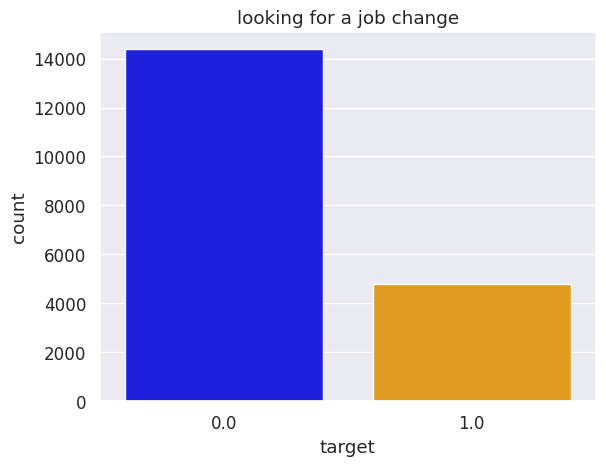

In [ ]:
sns.countplot(x='target', data=df, palette=['blue', 'orange'])
plt.title("looking for a job change")
plt.show()

**Training hours completed**

In [ ]:
min_value = df['training_hours'].min()
max_value = df['training_hours'].max()
print(f"Nilai terkecil dalam kolom 'training_hours': {min_value}")
print(f"Nilai terbesar dalam kolom 'training_hours': {max_value}")

Nilai terkecil dalam kolom 'training_hours': 1
Nilai terbesar dalam kolom 'training_hours': 336


<Axes: xlabel='training_hours', ylabel='Count'>

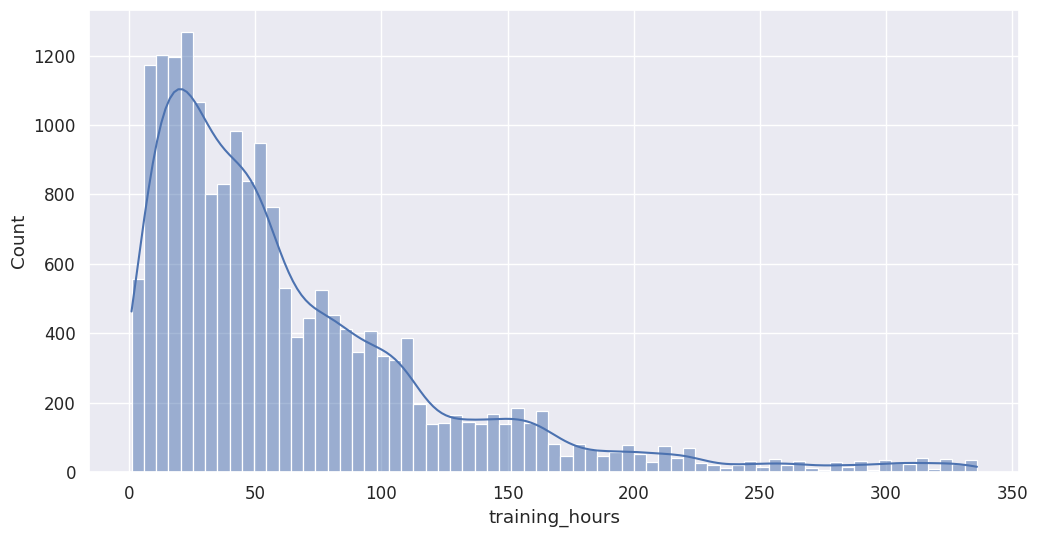

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df['training_hours'], kde=True)

**Candidate total experience in years**




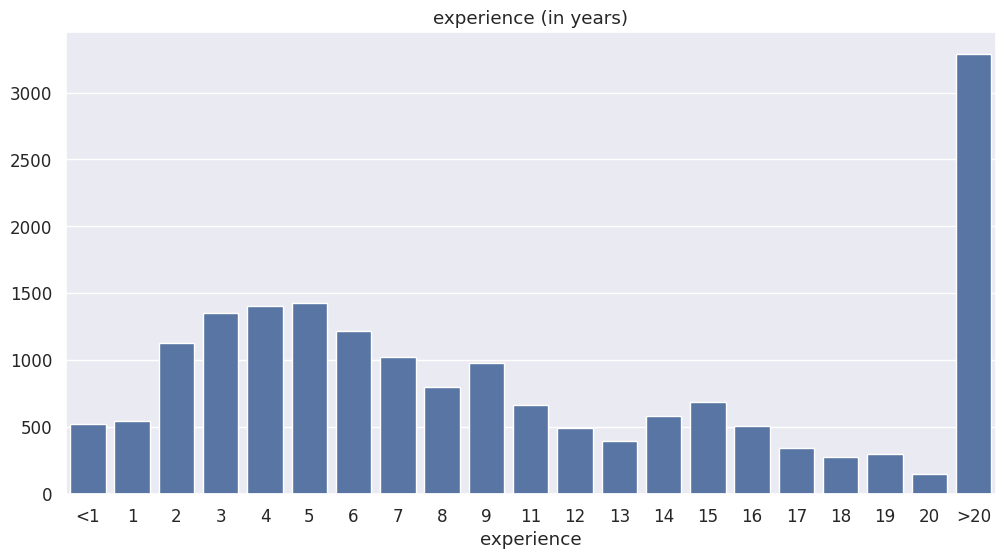

In [ ]:
plt.figure(figsize=(12, 6))
order = ['<1', '1', '2', '3', '4', '5', '6', '7', '8', '9', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '>20']
plot_bar_graph('experience', order=order,)
plt.title("experience (in years)")
plt.show()

**Developement index of the city (scaled) Distribution**

In [ ]:
min_value = df['city_development_index'].min()
max_value = df['city_development_index'].max()
print(f"Nilai terkecil dalam kolom 'city_development_index': {min_value}")
print(f"Nilai terbesar dalam kolom 'city_development_index': {max_value}")

Nilai terkecil dalam kolom 'city_development_index': 0.4479999999999999
Nilai terbesar dalam kolom 'city_development_index': 0.949


<Axes: title={'center': 'city development index'}, xlabel='city_development_index', ylabel='Count'>

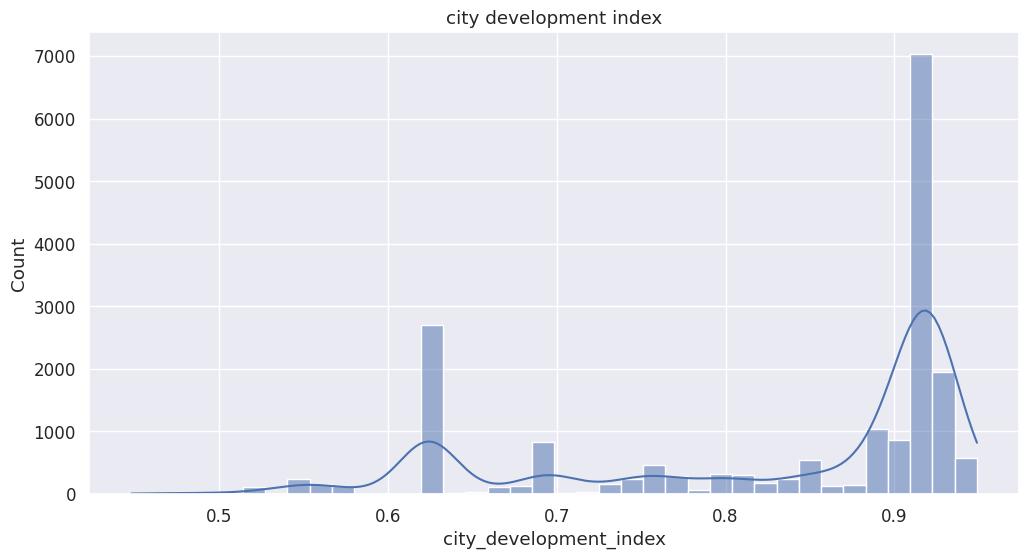

In [ ]:
plt.figure(figsize=(12, 6))
plt.title("city development index")
sns.histplot(df['city_development_index'], kde=True)

**Major Discipline**

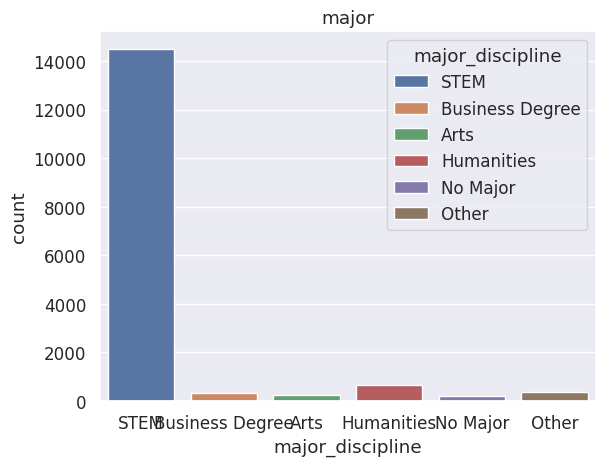

In [ ]:
sns.countplot(x='major_discipline', data=df, hue = "major_discipline")
plt.title("major")
plt.show()

**Education level distribution**

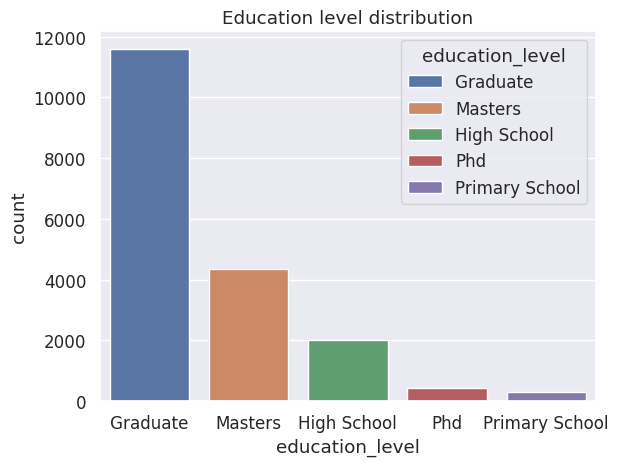

In [ ]:
sns.countplot(x='education_level', data=df, hue = "education_level")
plt.title("Education level distribution")
plt.show()

**Company size Distribution**

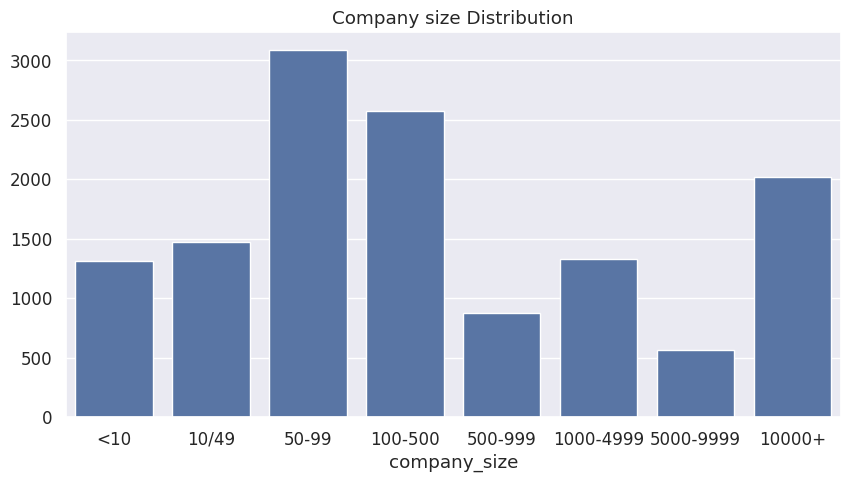

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("Company size Distribution")
order = ['<10', '10/49', '50-99', '100-500', '500-999', '1000-4999', '5000-9999', '10000+']
plot_bar_graph('company_size', order=order,)
plt.show()

**Company type Distribution**

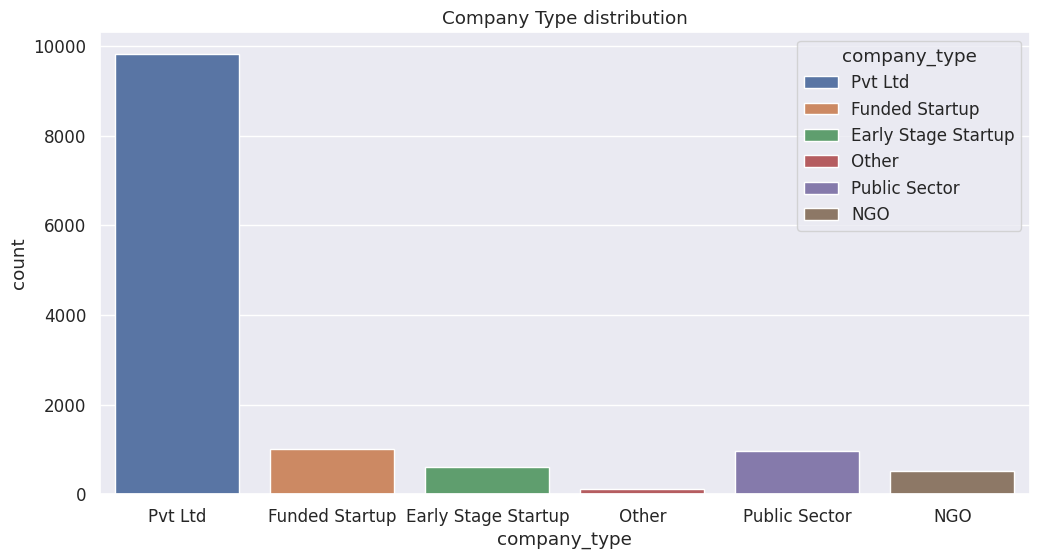

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='company_type', data=df, hue = "company_type")
plt.title("Company Type distribution")
plt.show()

**Difference in years between previous job and current job**

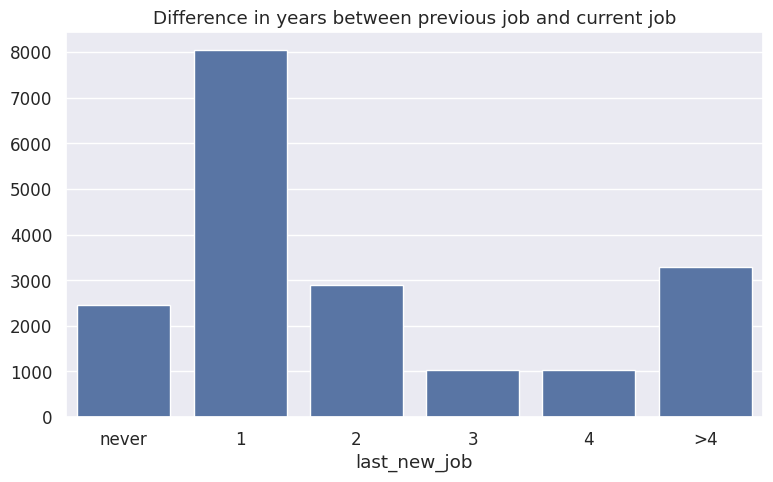

In [ ]:
plt.figure(figsize=(9, 5))
order = ['never', '1', '2', '3', '4', '>4']
plot_bar_graph('last_new_job', order=order)
plt.title("Difference in years between previous job and current job")
plt.show()

**Gender Distribution**

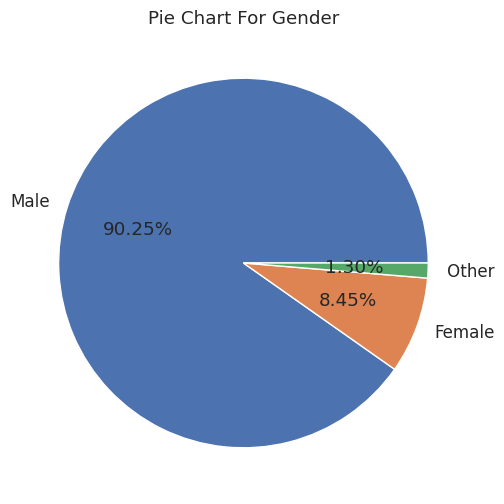

In [ ]:
plot_pie_chart('gender', title='Pie Chart For Gender')
plt.show()


**Relevent Experience**

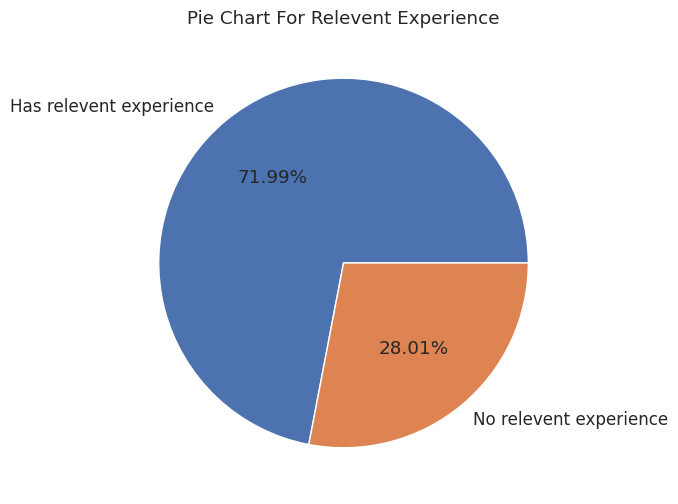

In [ ]:
plot_pie_chart('relevent_experience', title='Pie Chart For Relevent Experience')
plt.show()

**enrolled university distribution**

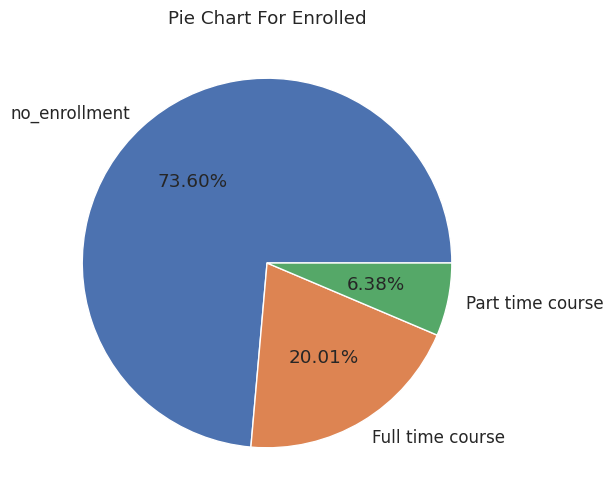

In [ ]:
plot_pie_chart('enrolled_university', title='Pie Chart For Enrolled')
plt.show()

**city by wordcloud**

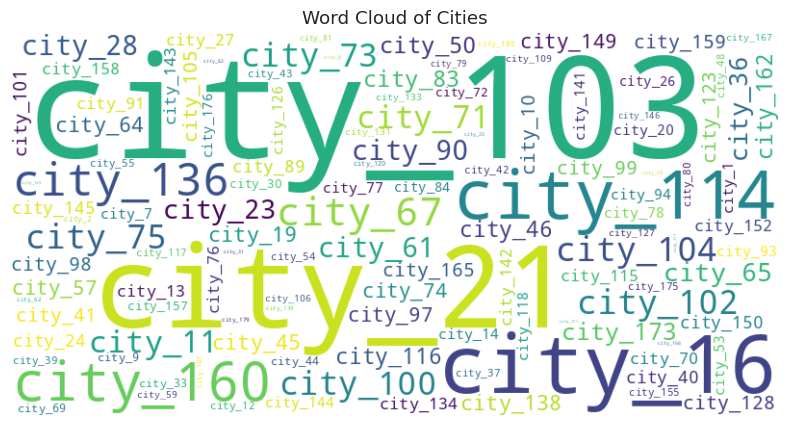

In [ ]:
def plot_word_cloud(column, title=''):
    text = ' '.join(df[column].astype(str).values)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

plot_word_cloud('city', title='Word Cloud of Cities')

# Multivariate Analysis

## Based on education level

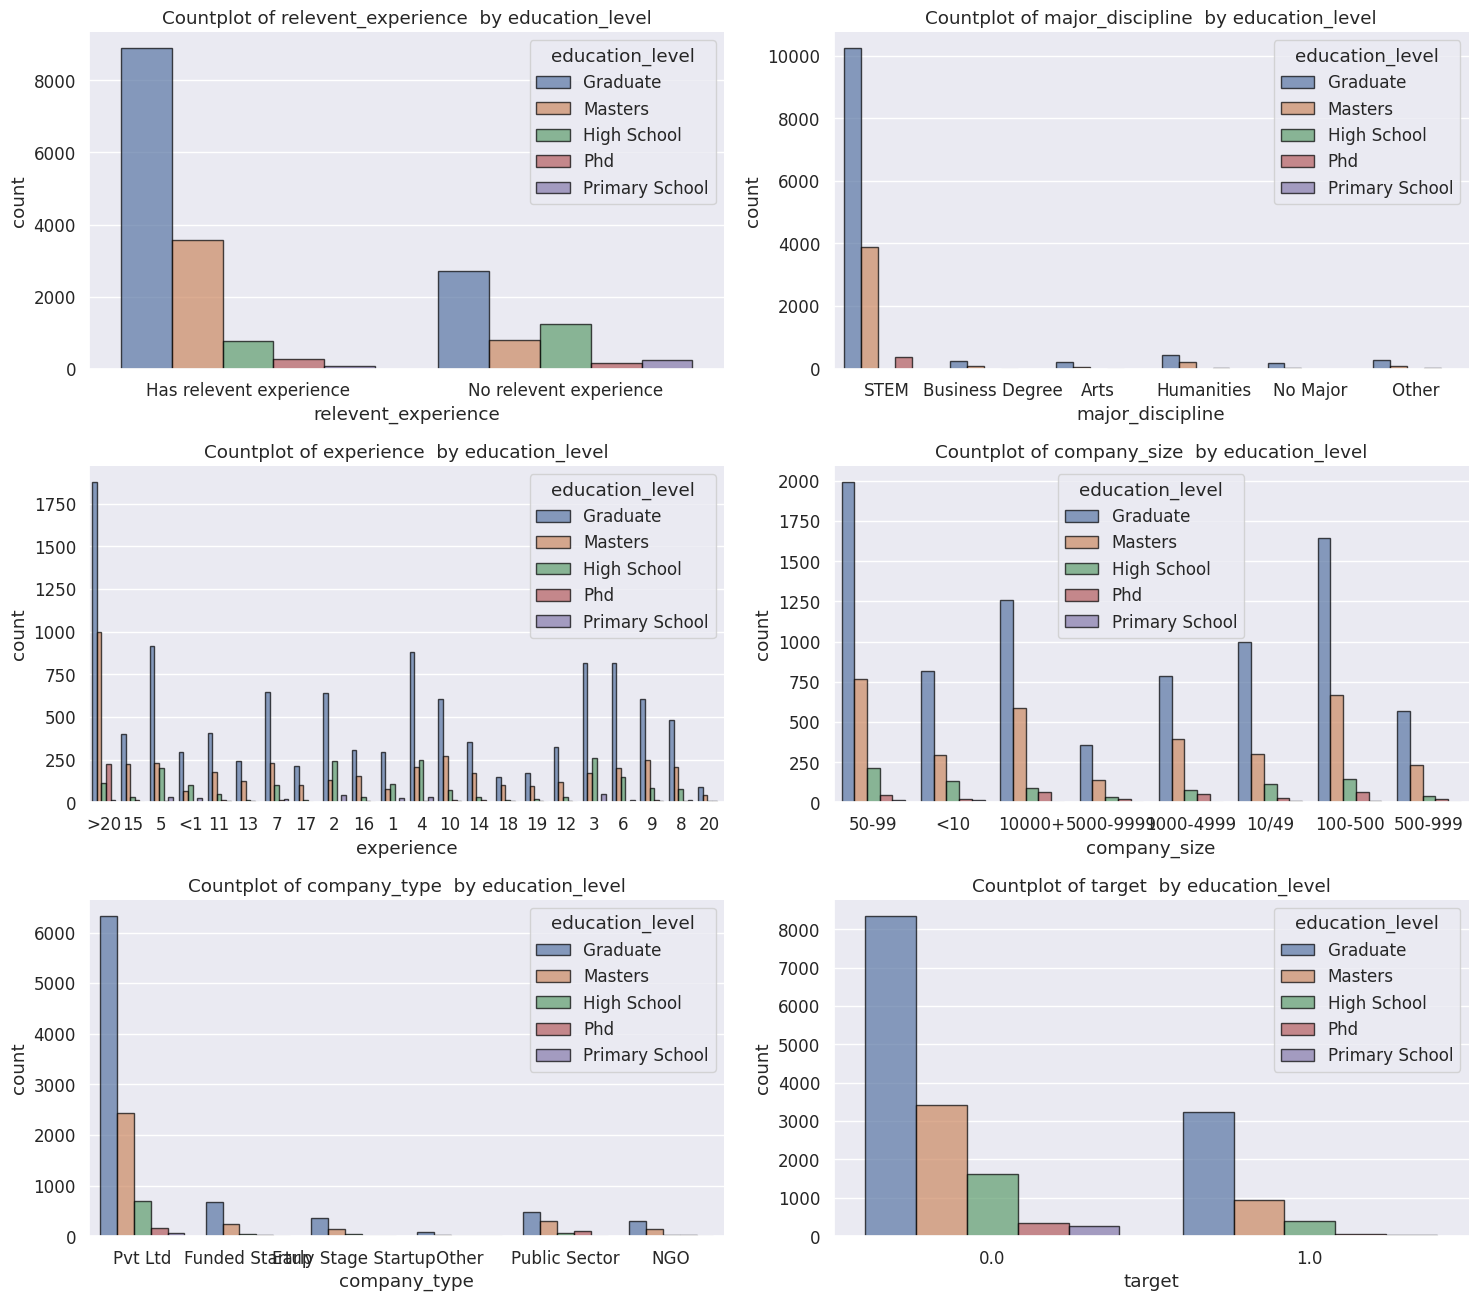

In [ ]:
plt.figure(figsize=[15,17])
fft=["relevent_experience", "major_discipline", "experience","company_size","company_type", "target"]
n=1
for f in fft:
    plt.subplot(4,2,n)
    sns.countplot(x=f, hue='education_level', edgecolor="black", alpha=0.7, data=df)
    sns.despine()
    plt.title("Countplot of {}  by education_level".format(f))
    n=n+1
plt.tight_layout()
plt.show()





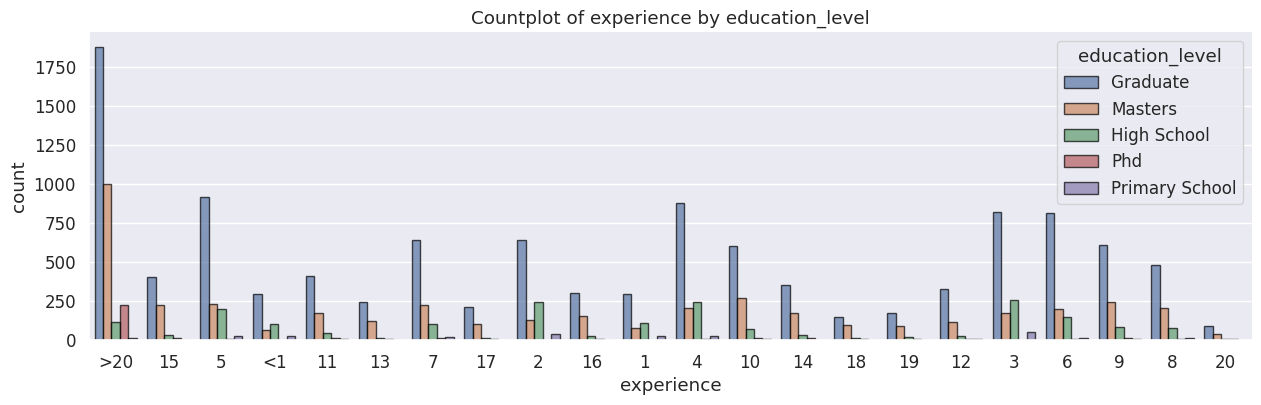

In [ ]:
plt.figure(figsize=[15,4])
sns.countplot(x='experience', hue='education_level',edgecolor="black", alpha=0.7, data=df)
sns.despine()
plt.title("Countplot of experience by education_level")
plt.show()

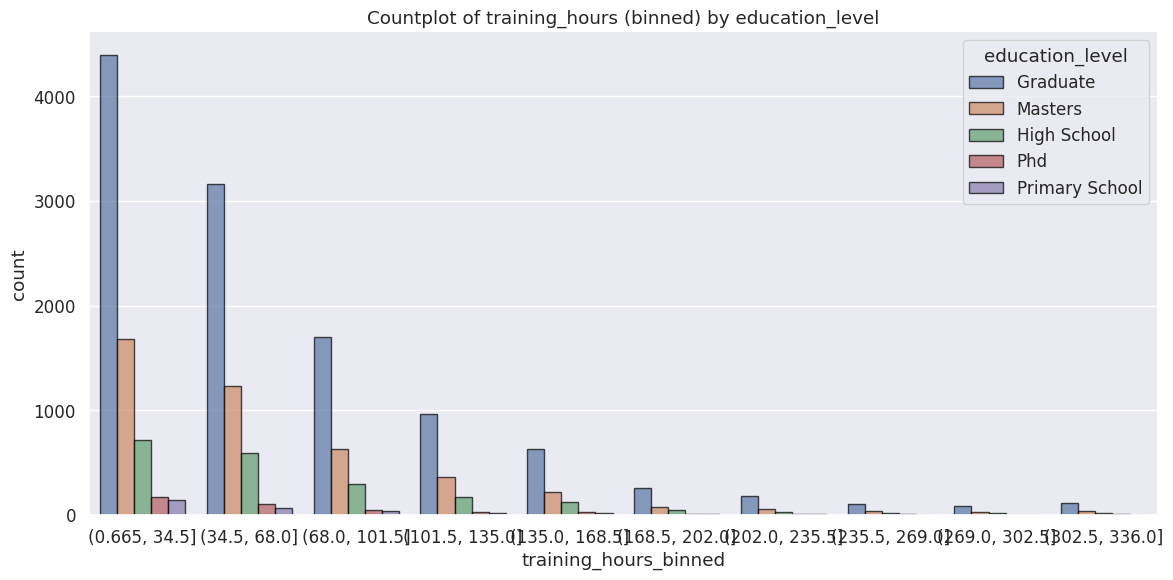

In [ ]:
df['training_hours_binned'] = pd.cut(df['training_hours'], bins=10)
plt.figure(figsize=[12, 6])
sns.countplot(x='training_hours_binned', hue='education_level', edgecolor="black", alpha=0.7, data=df)
sns.despine()
plt.title("Countplot of training_hours (binned) by education_level")
plt.tight_layout()
plt.show()

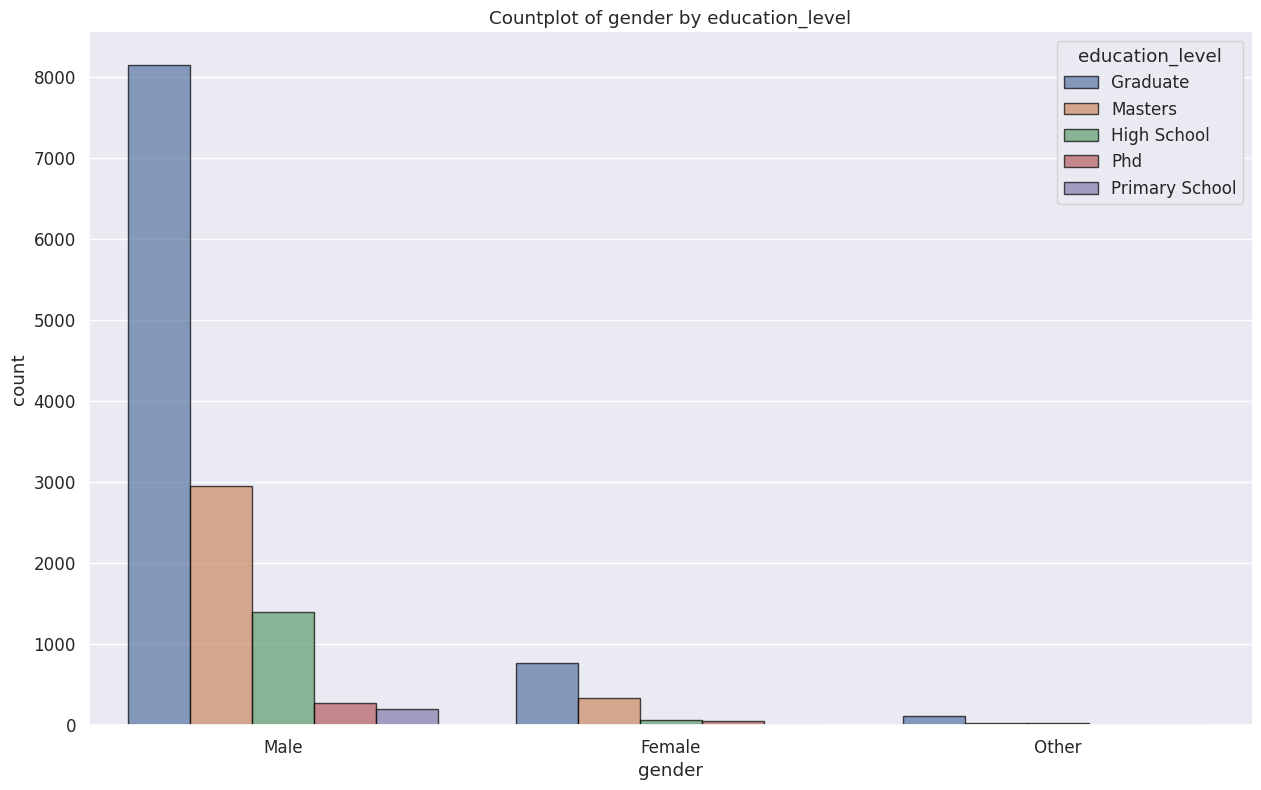

In [ ]:
plt.figure(figsize=[15,9])
sns.countplot(x='gender', hue='education_level',edgecolor="black", alpha=0.7, data=df)
sns.despine()
plt.title("Countplot of gender by education_level")
plt.show()

## city by city development index

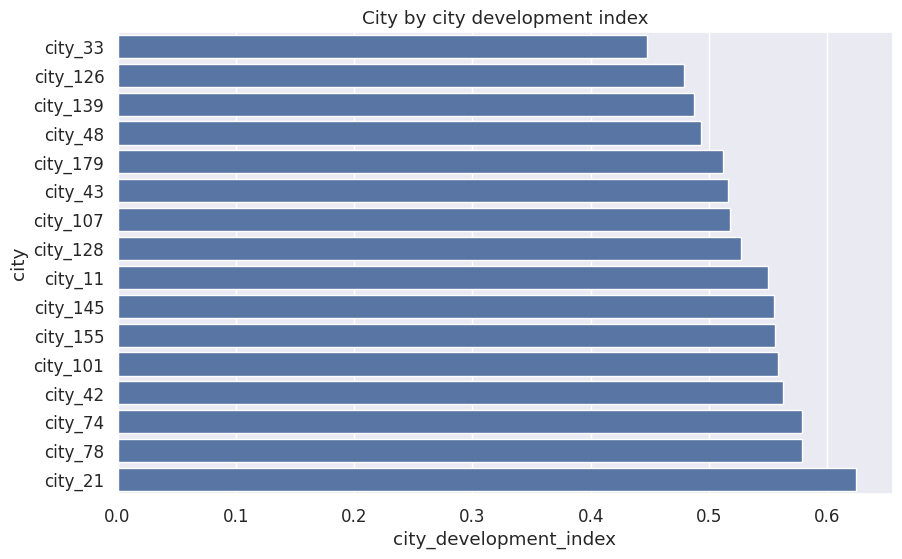

In [ ]:
cdi = df.sort_values(by='city_development_index', ascending=True)[:2000]
figure = plt.figure(figsize=(10,6))
sns.barplot(y=cdi.city, x=cdi.city_development_index)
plt.xticks()
plt.xlabel('city_development_index')
plt.ylabel('city')
plt.title('City by city development index')
plt.show()

<Figure size 800x500 with 0 Axes>

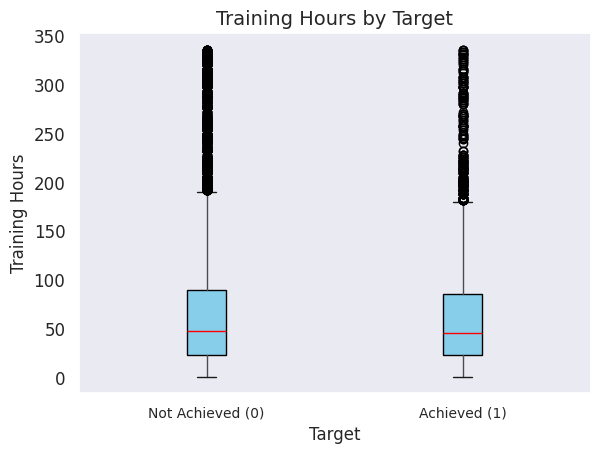

In [ ]:
plt.figure(figsize=(8, 5))
df.boxplot(column='training_hours', by='target', grid=False, patch_artist=True,
           boxprops=dict(facecolor='skyblue'), medianprops=dict(color='red'))
plt.title('Training Hours by Target', fontsize=14)
plt.suptitle('')  # Remove default title
plt.xlabel('Target', fontsize=12)
plt.ylabel('Training Hours', fontsize=12)
plt.xticks(ticks=[1, 2], labels=['Not Achieved (0)', 'Achieved (1)'], fontsize=10)
plt.show()

**Correlation in Data numerical**
* 1 indicates a strong positive relationship.
* -1 indicates a strong negative relationship.
* A result of zero indicates no relationship at all.

<Axes: >

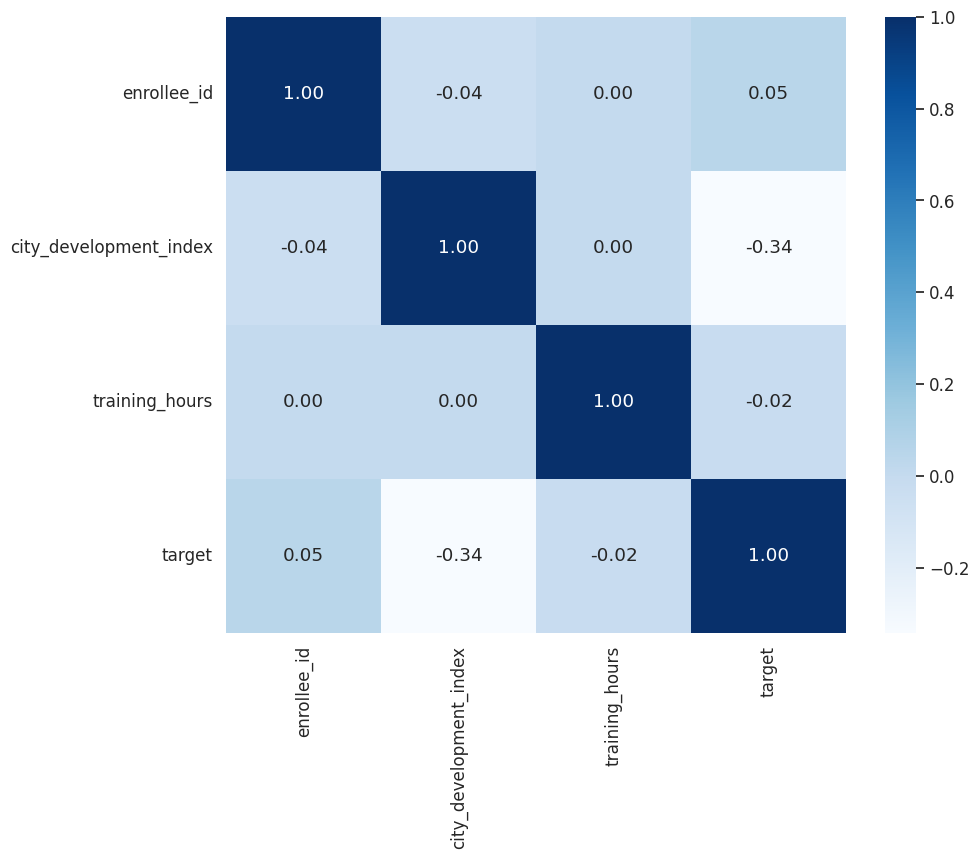

In [ ]:
numerical_data = df.select_dtypes(include=np.number)
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_data.corr(), cmap='Blues', annot=True, fmt='.2f')

# Handle Missing Values

merubah tiap value yang mengandung missing value menjadi numerik agar memudahkan mencari average

In [ ]:
# Creating a function that converts all values of , ['gender'], ['relevent_experience'] , ['enrolled_university'],
# , ['education_level'], ['major_discipline'], ['experience'], ['company_type'],  ['company_size']
# , ['last_new_job'], ['city'] into numbers

def gender_to_numeric(x):
    if x=='Female': return 2
    if x=='Male':   return 1
    if x=='Other':   return 0

def rel_experience(x):
    if x=='Has relevent experience': return 1
    if x=='No relevent experience':   return 0

def enrollment(x):
    if x=='no_enrollment'   : return 0
    if x=='Full time course':   return 1
    if x=='Part time course':   return 2

def edu_level(x):
    if x=='Graduate'       :   return 0
    if x=='Masters'        :   return 1
    if x=='High School'    :   return 2
    if x=='Phd'            :   return 3
    if x=='Primary School' :   return 4

def major(x):
    if x=='STEM'                   :   return 0
    if x=='Business Degree'        :   return 1
    if x=='Arts'                   :   return 2
    if x=='Humanities'             :   return 3
    if x=='No Major'               :   return 4
    if x=='Other'                  :   return 5

def experience(x):
    if x=='<1'      :   return 0
    if x=='1'       :   return 1
    if x=='2'       :   return 2
    if x=='3'       :   return 3
    if x=='4'       :   return 4
    if x=='5'       :   return 5
    if x=='6'       :   return 6
    if x=='7'       :   return 7
    if x=='8'       :   return 8
    if x=='9'       :   return 9
    if x=='10'      :   return 10
    if x=='11'      :   return 11
    if x=='12'      :   return 12
    if x=='13'      :   return 13
    if x=='14'      :   return 14
    if x=='15'      :   return 15
    if x=='16'      :   return 16
    if x=='17'      :   return 17
    if x=='18'      :   return 18
    if x=='19'      :   return 19
    if x=='20'      :   return 20
    if x=='>20'     :   return 21

def company_t(x):
    if x=='Pvt Ltd'               :   return 0
    if x=='Funded Startup'        :   return 1
    if x=='Early Stage Startup'   :   return 2
    if x=='Other'                 :   return 3
    if x=='Public Sector'         :   return 4
    if x=='NGO'                   :   return 5

def company_s(x):
    if x=='<10'          :   return 0
    if x=='10/49'        :   return 1
    if x=='100-500'      :   return 2
    if x=='1000-4999'    :   return 3
    if x=='10000+'       :   return 4
    if x=='50-99'        :   return 5
    if x=='500-999'      :   return 6
    if x=='5000-9999'    :   return 7

def last_job(x):
    if x=='never'        :   return 0
    if x=='1'            :   return 1
    if x=='2'            :   return 2
    if x=='3'            :   return 3
    if x=='4'            :   return 4
    if x=='>4'           :   return 5

def city(x):
    if x=='city_103'         : return  0
    if x=='city_40'          : return  1
    if x=='city_21'          : return  2
    if x=='city_115'         : return  3
    if x=='city_162'         : return  4
    if x=='city_176'         : return  5
    if x=='city_160'         : return  6
    if x=='city_46'          : return  7
    if x=='city_61'          : return  8
    if x=='city_114'         : return  9
    if x=='city_13'          : return  10
    if x=='city_159'         : return  11
    if x=='city_102'         : return  12
    if x=='city_67'          : return  13
    if x=='city_100'         : return  14
    if x=='city_16'          : return  15
    if x=='city_71'          : return  16
    if x=='city_104'         : return  17
    if x=='city_64'          : return  18
    if x=='city_101'         : return  19
    if x=='city_83'          : return  20
    if x=='city_105'         : return  21
    if x=='city_73'          : return  22
    if x=='city_75'          : return  23
    if x=='city_41'          : return  24
    if x=='city_11'          : return  25
    if x=='city_93'          : return  26
    if x=='city_90'          : return  27
    if x=='city_36'          : return  28
    if x=='city_20'          : return  29
    if x=='city_57'          : return  30
    if x=='city_152'         : return  31
    if x=='city_19'          : return  32
    if x=='city_65'          : return  33
    if x=='city_74'          : return  34
    if x=='city_173'         : return  35
    if x=='city_136'         : return  36
    if x=='city_98'          : return  37
    if x=='city_97'          : return  38
    if x=='city_50'          : return  39
    if x=='city_138'         : return  40
    if x=='city_82'          : return  41
    if x=='city_157'         : return  42
    if x=='city_89'          : return  43
    if x=='city_150'         : return  44
    if x=='city_70'          : return  45
    if x=='city_175'         : return  46
    if x=='city_94'          : return  47
    if x=='city_28'          : return  48
    if x=='city_59'          : return  49
    if x=='city_165'         : return  50
    if x=='city_145'         : return  51
    if x=='city_142'         : return  52
    if x=='city_26'          : return  53
    if x=='city_12'          : return  54
    if x=='city_37'          : return  55
    if x=='city_43'          : return  56
    if x=='city_116'         : return  57
    if x=='city_23'          : return  58
    if x=='city_99'          : return  59
    if x=='city_149'         : return  60
    if x=='city_10'          : return  61
    if x=='city_45'          : return  62
    if x=='city_80'          : return  63
    if x=='city_128'         : return  64
    if x=='city_158'         : return  65
    if x=='city_123'         : return  66
    if x=='city_7'           : return  67
    if x=='city_72'          : return  68
    if x=='city_106'         : return  69
    if x=='city_143'         : return  70
    if x=='city_78'          : return  71
    if x=='city_109'         : return  72
    if x=='city_24'          : return  73
    if x=='city_134'         : return  74
    if x=='city_48'          : return  75
    if x=='city_144'         : return  76
    if x=='city_91'          : return  77
    if x=='city_146'         : return  78
    if x=='city_133'         : return  79
    if x=='city_126'         : return  80
    if x=='city_118'         : return  81
    if x=='city_9'           : return  82
    if x=='city_167'         : return  83
    if x=='city_27'          : return  84
    if x=='city_84'          : return  85
    if x=='city_54'          : return  86
    if x=='city_39'          : return  87
    if x=='city_79'          : return  88
    if x=='city_76'          : return  89
    if x=='city_77'          : return  90
    if x=='city_81'          : return  91
    if x=='city_131'         : return  92
    if x=='city_44'          : return  93
    if x=='city_117'         : return  94
    if x=='city_155'         : return  95
    if x=='city_33'          : return  96
    if x=='city_141'         : return  97
    if x=='city_127'         : return  98
    if x=='city_62'          : return  99
    if x=='city_53'          : return  100
    if x=='city_25'          : return  101
    if x=='city_2'           : return  102
    if x=='city_69'          : return  103
    if x=='city_120'         : return  104
    if x=='city_111'         : return  105
    if x=='city_30'          : return  106
    if x=='city_1'           : return  107
    if x=='city_140'         : return  108
    if x=='city_179'         : return  109
    if x=='city_55'          : return  110
    if x=='city_14'          : return  111
    if x=='city_42'          : return  112
    if x=='city_107'         : return  113
    if x=='city_18'          : return  114
    if x=='city_139'         : return  115
    if x=='city_180'         : return  116
    if x=='city_166'         : return  117
    if x=='city_121'         : return  118
    if x=='city_129'         : return  119
    if x=='city_8'           : return  120
    if x=='city_31'          : return  121
    if x=='city_171'         : return  122

In [ ]:
df['gender'] = df['gender'].apply(gender_to_numeric)
df['relevent_experience'] = df['relevent_experience'].apply(rel_experience)
df['enrolled_university'] = df['enrolled_university'].apply(enrollment)
df['education_level'] = df['education_level'].apply(edu_level)
df['major_discipline'] = df['major_discipline'].apply(major)
df['experience'] = df['experience'].apply(experience)
df['company_type'] = df['company_type'].apply(company_t)
df['company_size'] = df['company_size'].apply(company_s)
df['last_new_job'] = df['last_new_job'].apply(last_job)
df['city'] = df['city'].apply(city)

df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,training_hours_binned
0,8949,0,0.920,1.0,1,0.0,0.0,0.0,21.0,NaN,NaN,1.0,36,1.0,"(34.5, 68.0]"
1,29725,1,0.776,1.0,0,0.0,0.0,0.0,15.0,5.0,0.0,5.0,47,0.0,"(34.5, 68.0]"
2,11561,2,0.624,NaN,0,1.0,0.0,0.0,5.0,NaN,NaN,0.0,83,0.0,"(68.0, 101.5]"
3,33241,3,0.789,NaN,0,NaN,0.0,1.0,0.0,NaN,0.0,0.0,52,1.0,"(34.5, 68.0]"
4,666,4,0.767,1.0,1,0.0,1.0,0.0,21.0,5.0,1.0,4.0,8,0.0,"(0.665, 34.5]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,35,0.878,1.0,0,0.0,0.0,3.0,14.0,NaN,NaN,1.0,42,1.0,"(34.5, 68.0]"
19154,31398,0,0.920,1.0,1,0.0,0.0,0.0,14.0,NaN,NaN,4.0,52,1.0,"(34.5, 68.0]"
19155,24576,0,0.920,1.0,1,0.0,0.0,0.0,21.0,5.0,0.0,4.0,44,0.0,"(34.5, 68.0]"
19156,5756,33,0.802,1.0,1,0.0,2.0,NaN,0.0,6.0,0.0,2.0,97,0.0,"(68.0, 101.5]"


In [ ]:
df['gender'] = df['gender'].fillna((df['gender'].mean()))
df['enrolled_university'] = df['enrolled_university'].fillna((df['enrolled_university'].mean()))
df['major_discipline'] = df['major_discipline'].fillna((df['major_discipline'].mean()))
df['company_size'] = df['company_size'].fillna((df['company_size'].mean()))
df['company_type'] = df['company_type'].fillna((df['company_type'].mean()))
df['education_level'] = df['education_level'].fillna((df['education_level'].mean()))


df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,training_hours_binned
0,8949,0,0.920,1.000000,1,0.000000,0.0,0.000000,21.0,3.27466,0.690966,1.0,36,1.0,"(34.5, 68.0]"
1,29725,1,0.776,1.000000,0,0.000000,0.0,0.000000,15.0,5.00000,0.000000,5.0,47,0.0,"(34.5, 68.0]"
2,11561,2,0.624,1.071468,0,1.000000,0.0,0.000000,5.0,3.27466,0.690966,0.0,83,0.0,"(68.0, 101.5]"
3,33241,3,0.789,1.071468,0,0.327775,0.0,1.000000,0.0,3.27466,0.000000,0.0,52,1.0,"(34.5, 68.0]"
4,666,4,0.767,1.000000,1,0.000000,1.0,0.000000,21.0,5.00000,1.000000,4.0,8,0.0,"(0.665, 34.5]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,35,0.878,1.000000,0,0.000000,0.0,3.000000,14.0,3.27466,0.690966,1.0,42,1.0,"(34.5, 68.0]"
19154,31398,0,0.920,1.000000,1,0.000000,0.0,0.000000,14.0,3.27466,0.690966,4.0,52,1.0,"(34.5, 68.0]"
19155,24576,0,0.920,1.000000,1,0.000000,0.0,0.000000,21.0,5.00000,0.000000,4.0,44,0.0,"(34.5, 68.0]"
19156,5756,33,0.802,1.000000,1,0.000000,2.0,0.344876,0.0,6.00000,0.000000,2.0,97,0.0,"(68.0, 101.5]"


In [ ]:
df.shape

(19158, 15)

In [ ]:
df.isnull().sum() #check missing values again

,0
enrollee_id,0
city,0
city_development_index,0
gender,0
relevent_experience,0
enrolled_university,0
education_level,0
major_discipline,0
experience,65
company_size,0


In [ ]:
df.dropna(subset=['last_new_job', 'experience'], inplace=True)
df.isnull().sum() #check missing values again

,0
enrollee_id,0
city,0
city_development_index,0
gender,0
relevent_experience,0
enrolled_university,0
education_level,0
major_discipline,0
experience,0
company_size,0


In [ ]:
df.shape

(18694, 15)

**Correlation in Data**
* 1 indicates a strong positive relationship.
* -1 indicates a strong negative relationship.
* A result of zero indicates no relationship at all.

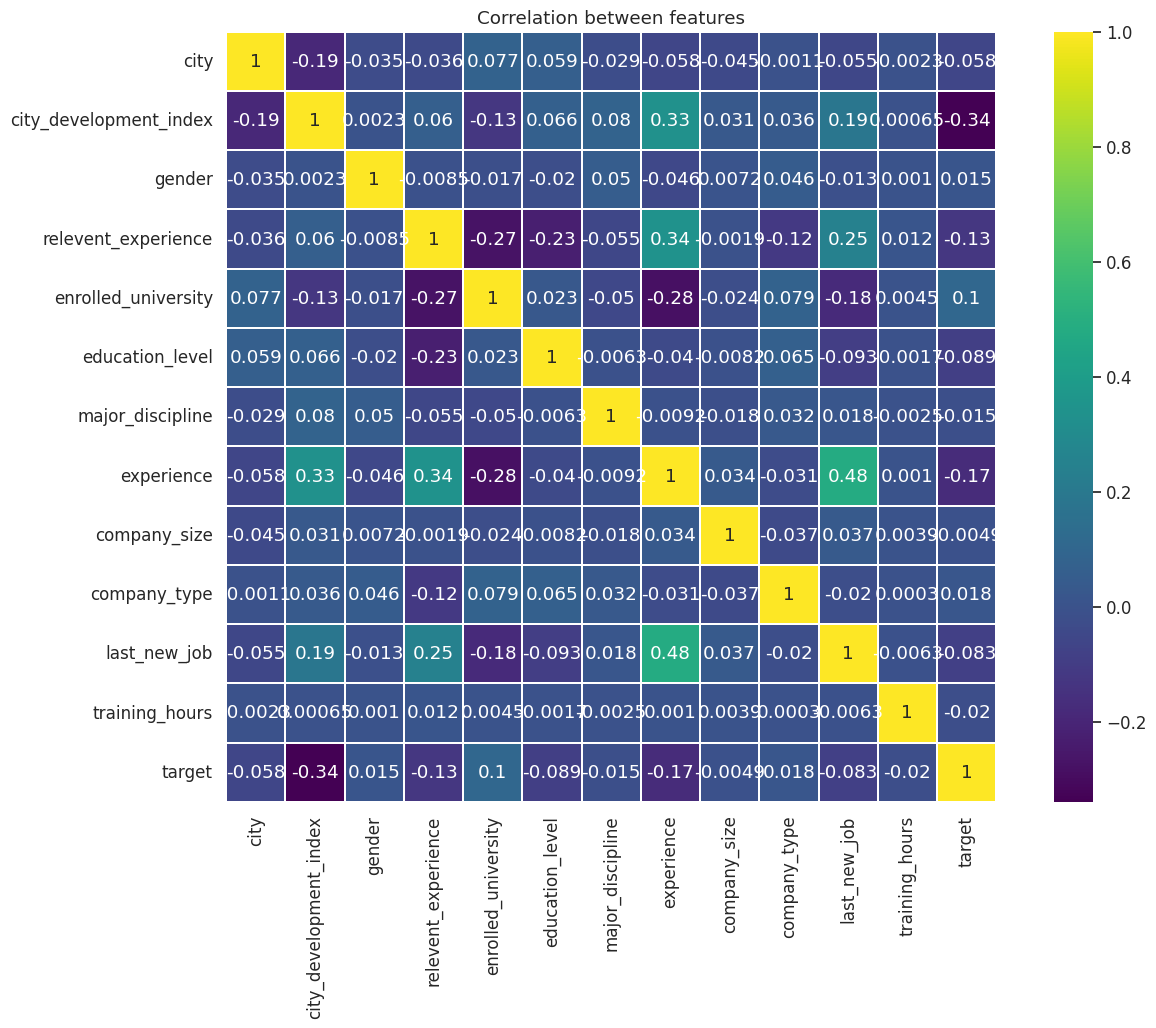

In [ ]:
corrMatrix=df[["city","city_development_index","gender","relevent_experience","enrolled_university","education_level",
                   "major_discipline","experience","company_size","company_type","last_new_job","training_hours","target"]].corr()

sns.set(font_scale=1.10)
plt.figure(figsize=(15, 10))

sns.heatmap(corrMatrix,  linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between features');

* city_development_index memiliki korelasi negatif yang kuat dengan target, yang menunjukkan bahwa kota dengan indeks pembangunan yang lebih tinggi cenderung memiliki karyawan yang lebih stabil.
* relevent_experience dan experience memiliki korelasi negatif dengan target, yang menunjukkan bahwa karyawan dengan pengalaman yang lebih banyak cenderung kurang mencari perubahan pekerjaan.
* education_level dan enrolled_university memiliki korelasi yang lemah dengan target, yang menunjukkan bahwa pendidikan tidak begitu memengaruhi kemungkinan mencari perubahan pekerjaan.
* company_size dan company_type memiliki korelasi yang lemah dengan target, yang menunjukkan bahwa faktor-faktor ini tidak begitu memengaruhi kemungkinan mencari perubahan pekerjaan.
